### Домашнее задание 1 Уразаевой Ренаты гр. Б06-002 Вариант 9.2

#### Условие:

Известно, что краевая задача:
$$\varepsilon y'' = y^{3} - y$$
$$y(0) = A < -1, y(1) = B > 1$$
имеет решение с внутренним погранслоем в точке $x = \frac{1}{2}$. Исследовать численно, как его толщина зависит от параметра $\varepsilon$.

Для решения задачи используется метод стрельбы. При решении нелинейной системы уравнений для пристрелочных параметров используется метод Ньютона. Производная решения по параметру в этом методе вычисляются в ходе решения задачи Коши для системы уравнений в вариациях. При решении задач Коши, к последовательности которых сводится метод, используется любой метод с порядком аппроксимации не ниже третьего.

Известно, что при $А = 0$, $В = 0$ данная краевая задача имеет еще два решения, кроме тривиального (y=0). Найдите их численно тем же методом.

Возьмем следующие граничные параметры:

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import optimize
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
A = -1.5
B = 1.5

Краевое условие для y(0):

In [7]:
y0 = A

Задаем правый предел интегрирования, начальный параметра $\varepsilon$ и отрезок, на котором решаем уравнение:

In [8]:
xf = 1
epsilon = 0.04
x = np.linspace(0, 1, 100)

Напишем функцию, используемую в методе стрельбы. Имеем вспомогательную систему с условиями: 
$$y'' = \frac{y^{3} - y}{\varepsilon}$$
$$y'(0) = \alpha$$
Функция возвращает два значения - первый и второй дифференциалы для использования в методе scipy.integrate.solve_ivp. Возвращает, соответственно, правую часть системы уравнений.

In [9]:
def f(x, b):
    y, alpha = b
    dy_dx = alpha
    d2y_dx2 = (y**3 - y) / epsilon  # acceleration
    return dy_dx, d2y_dx2

Функция поиска решения вспомогательной системы:

@np.vectorize - декоратор для векторизации функции, т.к. значения необходимо получать в векторизованом виде для scipy.optimize.newton

In [10]:
@np.vectorize
def shooting_method(alpha0):
    #Первый аргумент - функция правой части
    #Второй - отрезок интегрирования - [0; 1], согласно условию
    #Третий - условия Задачи Коши для вспомогательной системы
    #Четвертый - отрезок интегрирования
    sol = solve_ivp(f, (0, 1), (y0, alpha0), t_eval=x)
    #Получаем численное решение для y и для alpha
    y_num, alpha = sol.y
    #Возвращаем решение уравнения, нормированое по второму краевому условию
    #Чтобы потом использовать в методе Ньютона для нахождения решения в каноническом виде F(a) = 0
    return y_num[-1] - B

Параметр для Задачи Коши: 4.878003770774048


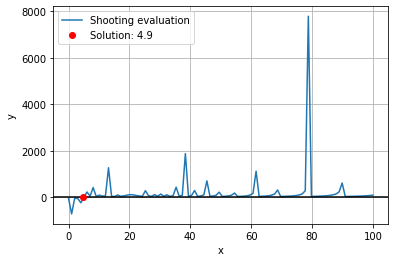

In [11]:
fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки:
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
#Первый аргумент - функция полученной ЗК в методе стрельбы
#Второй - число, в окресности которого находится предположительный нуль.
#При неудачном выборе значения метод может не сойтись (ошибка метода начнет неограничено возрастать)
#Третий - указываем допустимую ошибку метода
alpha0 = optimize.newton(shooting_method, 4.9, tol=epsilon**3)
print(f'Параметр для Задачи Коши: {alpha0}')
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
plt.close()

Решаем вспомогательную систему для найденного значения параметра $\alpha$:

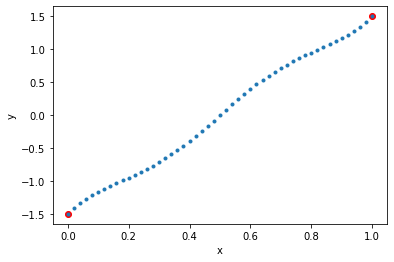

In [12]:
x = np. linspace(0, xf, 51)
sol = solve_ivp(f, (0, xf), (y0, alpha0), t_eval=x)
y, alpha = sol.y

plt.plot(x[0], y0, 'ro')
plt.plot(x[-1], B, 'ro')
plt.plot(x, y, ".")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Из графика видим, что полученное решение действительно соответствует краевым условиям: $$y(0) = -1.5, y(1) = 1.5$$

Посмотрим разные значения для параметра $epsilon$:

In [27]:
epsilon = 0.01

8.864630640532647


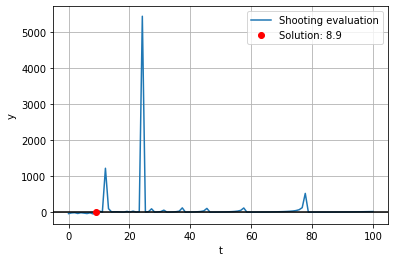

In [28]:
fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки:
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
#Первый аргумент - функция полученной ЗК в методе стрельбы
#Второй - число, в окресности которого находится предположительный нуль.
#При неудачном выборе значения метод может не сойтись (ошибка метода начнет неограничено возрастать)
#Третий - указываем допустимую ошибку метода
alpha0 = optimize.newton(shooting_method, 9, tol=epsilon**3)
print(alpha0)
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()
plt.close()

Решаем Вспомогательную систему для найденного значения параметра $\alpha$:

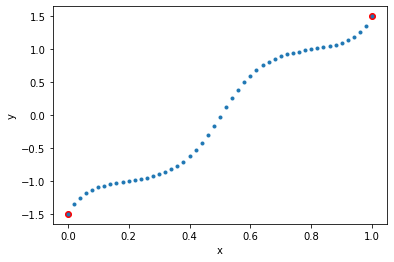

In [30]:
x = np. linspace(0, xf, 51)
sol = solve_ivp(f, (0, xf), (y0, alpha0), t_eval=x)
y, alpha = sol.y

plt.plot(x[0], y0, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x[-1], B, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x, y, ".")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Из графика так же видим, что полученное решение действительно соответствует краевым условиям $$y(0) = -1.5, y(1) = 1.5$$

Так же стоит заметить, как поменялось решение. Можно сделать вывод, что при уменьшении параметра $\varepsilon$ решение отклоняется от прямой $y = 3x-1.5$.

In [16]:
epsilon = 0.001

29.683894027999987


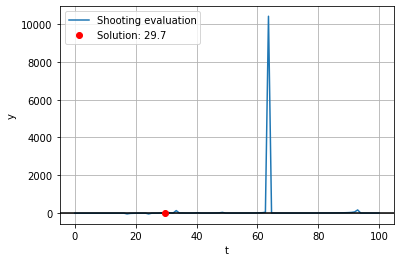

In [17]:
fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки:
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
#Первый аргумент - функция полученной ЗК в методе стрельбы
#Второй - число, в окресности которого находится предположительный нуль.
#При неудачном выборе значения метод может не сойтись (ошибка метода начнет неограничено возрастать)
#Третий - указываем допустимую ошибку метода
alpha0 = optimize.newton(shooting_method, 30, tol=epsilon**1)
print(alpha0)
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()
plt.close()

In [36]:
epsilon = 0.0001

92.67613954253295


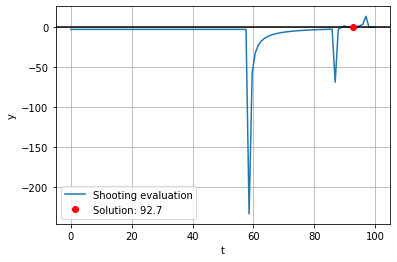

In [37]:
fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки:
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
#Первый аргумент - функция полученной ЗК в методе стрельбы
#Второй - число, в окресности которого находится предположительный нуль.
#При неудачном выборе значения метод может не сойтись (ошибка метода начнет неограничено возрастать)
#Третий - указываем допустимую ошибку метода
alpha0 = optimize.newton(shooting_method, 93, tol=epsilon**1)
print(alpha0)
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('t')
ax.set_ylabel('y')
plt.show()
plt.close()

Для двух последних альфа графики решений не удалось построить, тк метод не сходиться. В библиотеке, которую мы использовали встроенные методы - метод Рунге-Кутты 4(5) порядка аппроксимации.

Найдем численно решения уравнения при $А = 0$, $В = 0$ тем же методом:

0.0


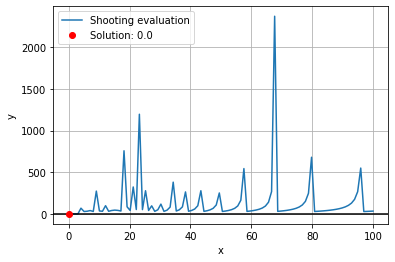

In [66]:
#новые граничные параметры A, B
A = 0
B = 0
epsilon = 0.04

fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
alpha0 = optimize.newton(shooting_method, 0, tol=epsilon**3)
print(alpha0)
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
plt.close()

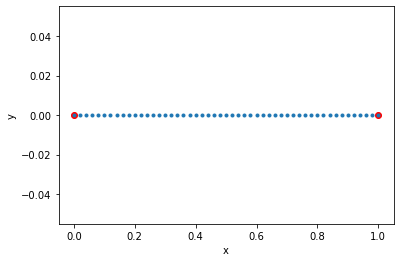

In [67]:
x = np. linspace(0, xf, 51)
sol = solve_ivp(f, (0, xf), (y0, alpha0), t_eval=x)
y, alpha = sol.y

plt.plot(x[0], y0, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x[-1], B, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x, y, ".")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Мы нашли тривиальное решение уравнения : $y = 0$.

-2.133173330509703


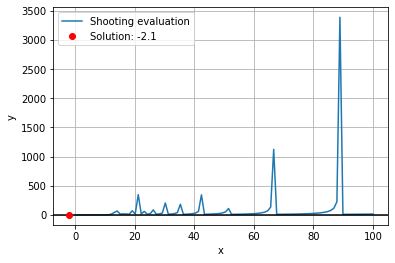

In [68]:
epsilon = 0.004

fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
alpha0 = optimize.newton(shooting_method, -2, tol=epsilon**3)
print(alpha0)
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
plt.close()

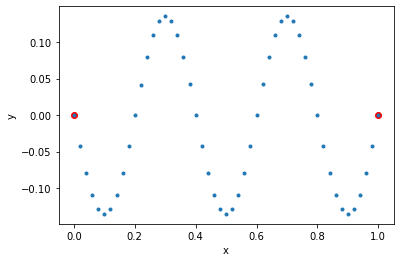

In [69]:
x = np. linspace(0, xf, 51)
sol = solve_ivp(f, (0, xf), (y0, alpha0), t_eval=x)
y, alpha = sol.y

plt.plot(x[0], y0, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x[-1], B, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x, y, ".")

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Мы нашли второе решение исходного уравнения. Осталось третье.

50.91691118284909


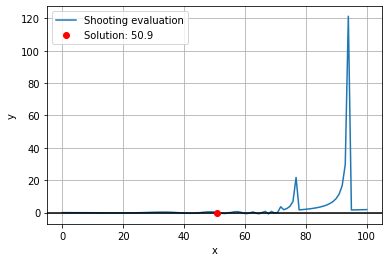

In [74]:
epsilon = 0.0001
fig, ax = plt.subplots()
alpha0 = np.linspace(0, 100, 100)
#График для параметров пристрелки
plt.plot(alpha0, shooting_method(alpha0), label='Shooting evaluation')
plt.axhline(c="k")

#Метод Ньютона
alpha0 = optimize.newton(shooting_method, 51, tol=epsilon**3)
print(alpha0)
plt.plot(alpha0, 0, 'ro', label=f'Solution: {alpha0:.1f}')

plt.grid(True)
plt.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
plt.close()

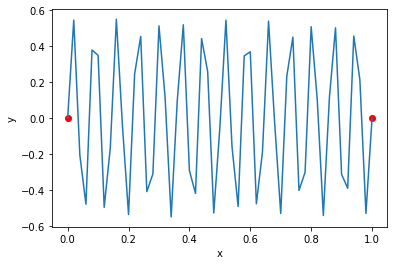

In [76]:
#x = np. linspace(0, xf, 51)
sol = solve_ivp(f, (0, xf), (y0, alpha0), t_eval=x)
y, alpha = sol.y

plt.plot(x[0], y0, 'ro', label=f'Solution: {alpha0:.1f}')
plt.plot(x[-1], B, 'ro', label=f'Solution: {alpha0:.1f}')
#plt.plot(x, y, ".")
plt.plot(sol.t, y)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

Итого: мы нашли три решения нашим методом. 

Список литературы, используемый при выполнении задачи:
1) "ЧИСЛЕННЫЕ МЕТОДЫ РЕШЕНИЯ КРАЕВЫХ ЗАДАЧ ДЛЯ ОБЫКНОВЕННЫХ ДИФФЕРЕНЦИАЛЬНЫХ УРАВНЕНИЙ" А.Ю. Крайнов, К.М. Моисеева

2) https://vk.com/doc516145884_632324750?hash=fbb5d7846558106494&dl=a220128f9e1f2f6473 